In [30]:
import SED_statistical_analysis
import scipy.stats as stats
from utils import *
import pcigale.sed_modules
import pandas as pd
import astropy
import numpy as np

np.random.seed(42)

In [31]:
#Used only to recover the true values
#A=astropy.io.fits.open("/home/aufort/Desktop/jorge/results.fits")
#B = A[1].data
#galaxy_targ = B[0]


#The true simulating values
#fit_jorge = {"tau_main" : galaxy_targ["best.sfh.tau_main"],
#                'age_main':galaxy_targ["best.sfh.age_main"],
#                  'tau_burst':galaxy_targ["best.sfh.tau_burst"],
#                  'f_burst':galaxy_targ["best.sfh.f_burst"],
#                  'age_burst':galaxy_targ["best.sfh.age_burst"]
#                  }


#this part should be the tricky one as I doubt we have the same data format : 
#galaxy_obs should contain the following

galaxy_obs  = {"spectroscopy_wavelength":None, #spec_wavelength
                       "spectroscopy_fluxes":None,
                       "spectroscopy_err" : None,
                       "photometry_fluxes" : np.array([ 0.043260654413243, 0.030267351185249, 0.261043050896474, 18.55215, 14.2668494763794, 8.143585685525583]),
                        "photometry_err" :np.array([ 0.001332175743682, 0.001241532102868, 0.016872647068945, 18.55215, 14.2668494763794, 8.143585685525583]), 
                       "bands" : ['IRAC1','IRAC2', 'spitzer.mips.24', 'PACS_red','herschel.spire.PMW','herschel.spire.PLW'],
                       "wave":None, #spec_wavelenght
                       "redshift" : 0.8301,
                       }

#with "None" for every useless input (the spectroscopy ones).

#I can use this to identify the fluxes I want, check SED_statitical_analysis because by Gregoire was done by hand

#galaxy_obs = SED_statistical_analysis.read_galaxy_fits("observations.fits", 
#                 str(galaxy_targ["id"])+"_best_model.fits",
#                 ident = galaxy_targ["id"])

In [32]:
galaxy_obs["bands"] =galaxy_obs["bands"][:3] + galaxy_obs["bands"][-2:]
galaxy_obs["photometry_err"]= np.append(galaxy_obs["photometry_err"][:3],galaxy_obs["photometry_err"][-2:])
galaxy_obs["photometry_fluxes"]= np.append(galaxy_obs["photometry_fluxes"][:3],galaxy_obs["photometry_fluxes"][-2:])


In [33]:
galaxy_obs["bands"][:2] + galaxy_obs["bands"][-3:]

['IRAC1',
 'IRAC2',
 'spitzer.mips.24',
 'herschel.spire.PMW',
 'herschel.spire.PLW']

In [34]:
galaxy_obs["photometry_err"]

array([1.33217574e-03, 1.24153210e-03, 1.68726471e-02, 1.42668495e+01,
       8.14358569e+00])

In [35]:
bands = list(galaxy_obs["bands"])


In [36]:
bands

['IRAC1',
 'IRAC2',
 'spitzer.mips.24',
 'herschel.spire.PMW',
 'herschel.spire.PLW']

In [37]:

module_list= ['sfhdelayed', 'bc03','dustatt_modified_CF00','dl2014', 'redshifting']

module_parameters_to_fit = {'tau_main': {"type":"unif","min":1500,"max" :3000},
            'age_main': {"type":"unif","min":1000,"max" :10000},
            'tau_burst':{"type":"unif","min":100,"max" :10000},
            'f_burst': {"type":"unif","min":0,"max" :0.2},
            'age_burst': {"type":"unif","min":10,"max" :100},
    
}

module_parameters_discrete = {'sfr_A' : [1.],
                             'normalise' : [True],
                             'Av_ISM' : [0, 0.05, 0.1, 0.3, 0.8, 1.2, 1.7, 2.3, 3.3, 3.8],
                             'mu' :[0.5],
                             'slope_ISM':[-0.7],
                             'slope_BC' : [-0.7],
                             'imf' : [1],
                             'metallicity' : [0.02,0.004],
                             'qpah' : [0.47, 2.50, 4.58],
                             'umin' : [5.0,10.0,25.0],
                             'alpha' : [2],
                             'gamma' : [0.02],
                             'separation_age': [10],
                             'redshift':[galaxy_obs["redshift"]],
                             'filters':["B_B90 & V_B90 & FUV"],
        
                             }


file_store = 'store_parameters_example_Gabriele.csv'


In [38]:
CIGALE_parameters= {"module_list":module_list,
                    "path_deep" : None,
                    "file_store":file_store,
                    "deep_modules":None,
                    "module_parameters_to_fit":module_parameters_to_fit,
                    "module_parameters_discrete":module_parameters_discrete,
                    "n_bins":None,
                    "wavelength_limits" : None,
                    "nebular" :None,
                    "bands" :bands,
                    "mode" : ["photo"],
                    "n_jobs" : 8}

In [39]:
CIGALE_parameters

{'module_list': ['sfhdelayed',
  'bc03',
  'dustatt_modified_CF00',
  'dl2014',
  'redshifting'],
 'path_deep': None,
 'file_store': 'store_parameters_example_Gabriele.csv',
 'deep_modules': None,
 'module_parameters_to_fit': {'tau_main': {'type': 'unif',
   'min': 1500,
   'max': 3000},
  'age_main': {'type': 'unif', 'min': 1000, 'max': 10000},
  'tau_burst': {'type': 'unif', 'min': 100, 'max': 10000},
  'f_burst': {'type': 'unif', 'min': 0, 'max': 0.2},
  'age_burst': {'type': 'unif', 'min': 10, 'max': 100}},
 'module_parameters_discrete': {'sfr_A': [1.0],
  'normalise': [True],
  'Av_ISM': [0, 0.05, 0.1, 0.3, 0.8, 1.2, 1.7, 2.3, 3.3, 3.8],
  'mu': [0.5],
  'slope_ISM': [-0.7],
  'slope_BC': [-0.7],
  'imf': [1],
  'metallicity': [0.02, 0.004],
  'qpah': [0.47, 2.5, 4.58],
  'umin': [5.0, 10.0, 25.0],
  'alpha': [2],
  'gamma': [0.02],
  'separation_age': [10],
  'redshift': [0.8301],
  'filters': ['B_B90 & V_B90 & FUV']},
 'n_bins': None,
 'wavelength_limits': None,
 'nebular': None

In [40]:

TAMIS_parameters =initialize_TAMIS(CIGALE_parameters)

In [41]:
result = SED_statistical_analysis.fit(galaxy_obs , CIGALE_parameters, TAMIS_parameters)
print(result[1])

Iteration 0
ESS =  6.955994453129979
Kullback-Leibler divergence =  4.002144190064746
perplexity =  0.018276408751265193
Iteration 1
ESS =  6.775446631534282
Kullback-Leibler divergence =  3.559710328166636
perplexity =  0.028447063833941022
Iteration 2
ESS =  11.201248120806177
Kullback-Leibler divergence =  3.377922190111934
perplexity =  0.03411827242007553
Iteration 3
ESS =  7.286174344110149
Kullback-Leibler divergence =  3.566643330393253
perplexity =  0.028250522375478856
Iteration 4
ESS =  16.54199416555573
Kullback-Leibler divergence =  2.8433325154104665
perplexity =  0.05823128559998093
Iteration 5
ESS =  19.979914089266963
Kullback-Leibler divergence =  2.5579318435882152
perplexity =  0.07746478417860168
Iteration 6
ESS =  12.796899958697734
Kullback-Leibler divergence =  3.009165461664357
perplexity =  0.049332831725490994
Iteration 7
ESS =  17.687945375882343
Kullback-Leibler divergence =  2.634370538248864
perplexity =  0.07176412796796625
Iteration 8
ESS =  13.95284240

KeyboardInterrupt: 

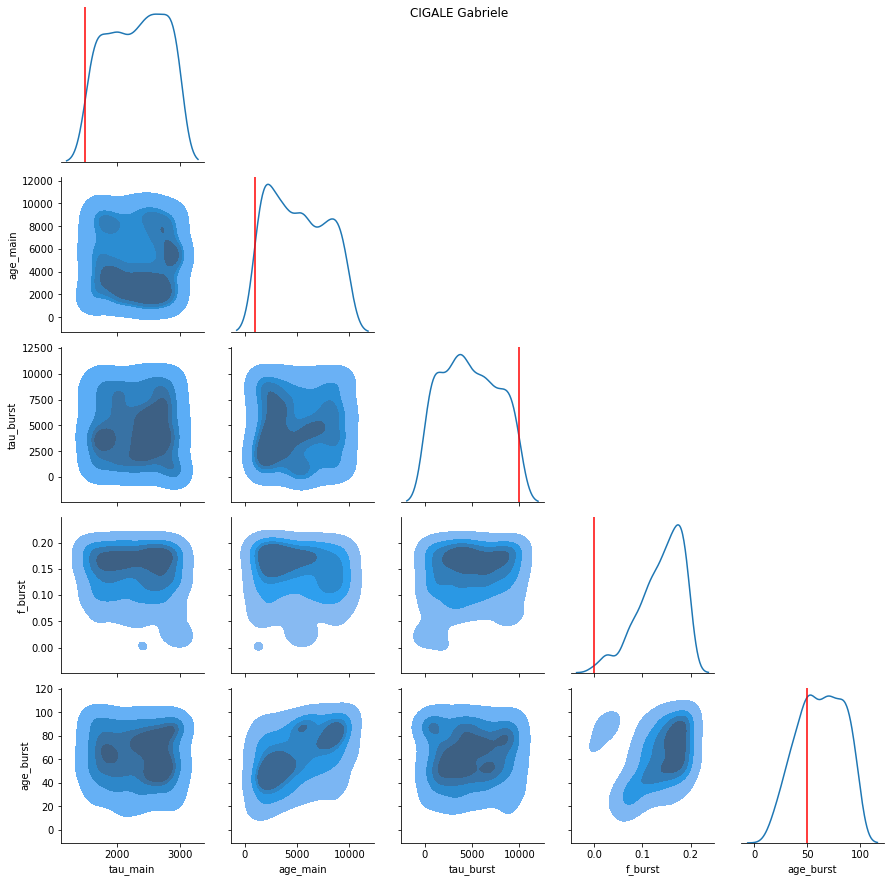

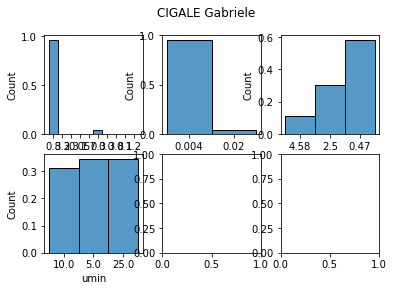

In [22]:
SED_statistical_analysis.plot_result(CIGALE_parameters,
                                      #line_dict_fit = fit_jorge,
                                      title = "CIGALE Gabriele")



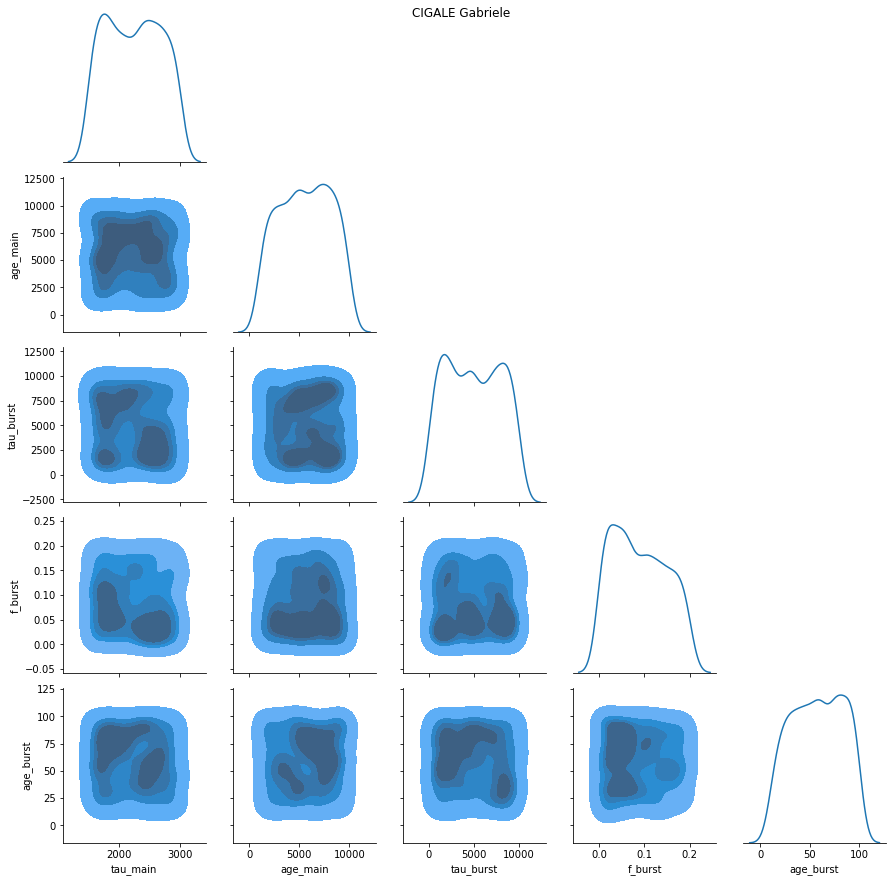

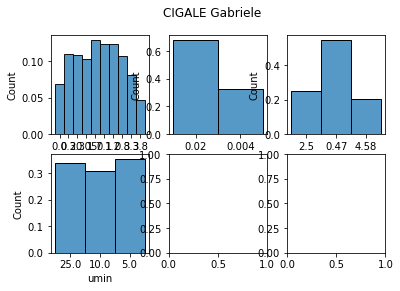

In [39]:
SED_statistical_analysis.plot_result(CIGALE_parameters,
                                      #line_dict_fit = fit_jorge,
                                      title = "CIGALE Gabriele")


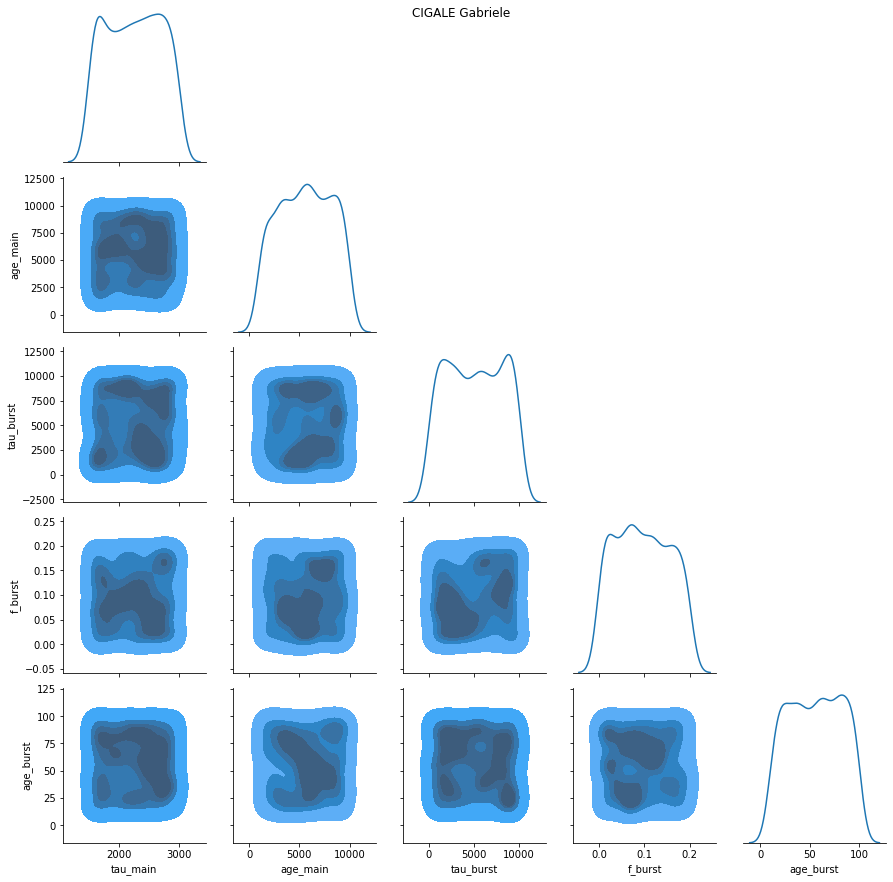

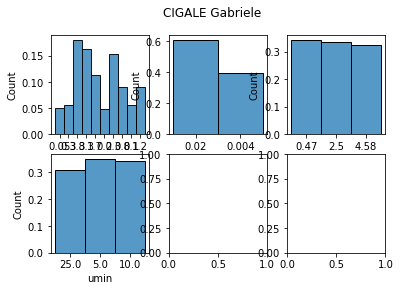

In [54]:
SED_statistical_analysis.plot_result(CIGALE_parameters,
                                      #line_dict_fit = fit_jorge,
                                      title = "CIGALE Gabriele")


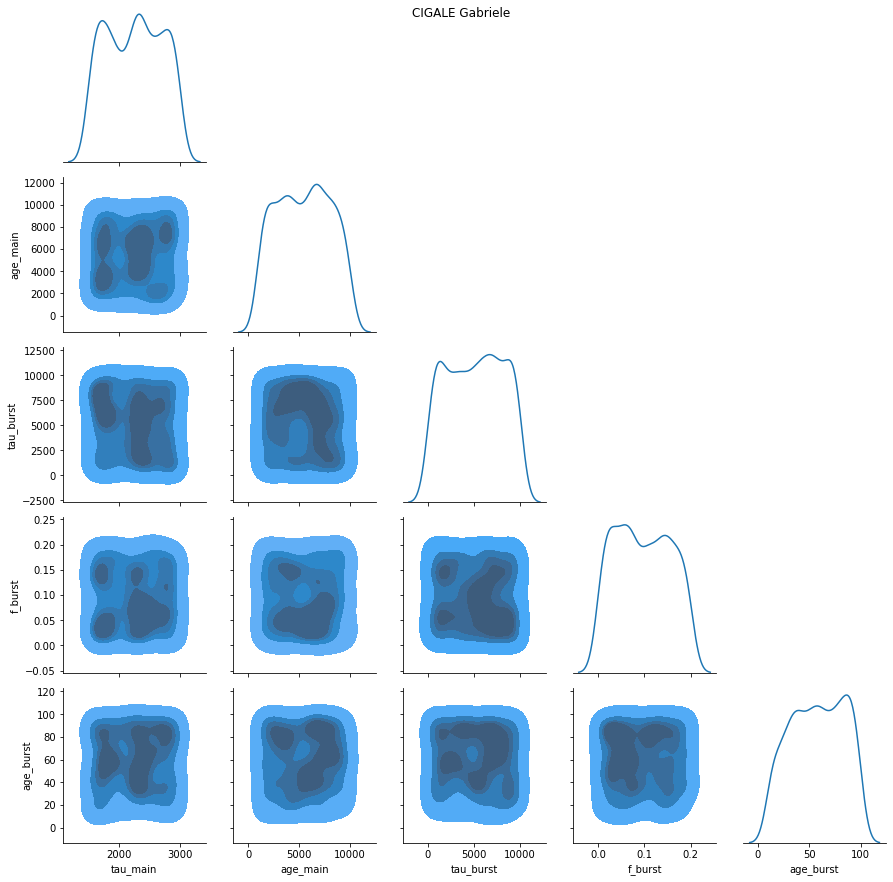

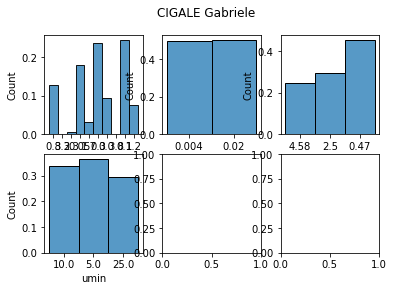

In [17]:
SED_statistical_analysis.plot_result(CIGALE_parameters,
                                      #line_dict_fit = fit_jorge,
                                      title = "CIGALE Gabriele")


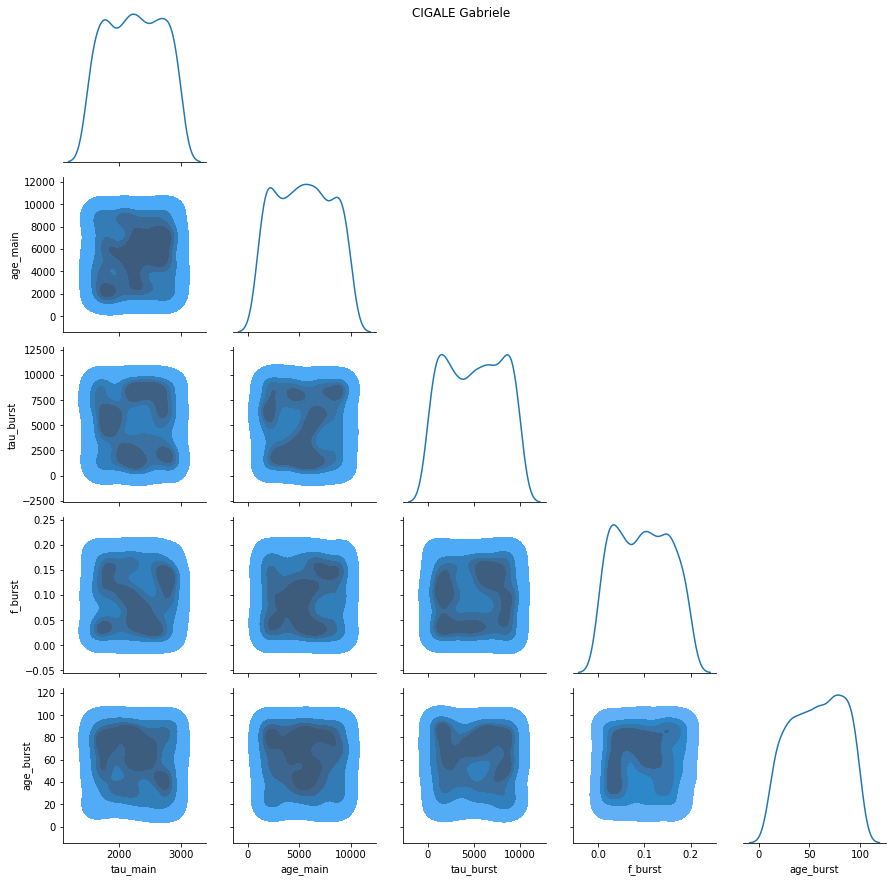

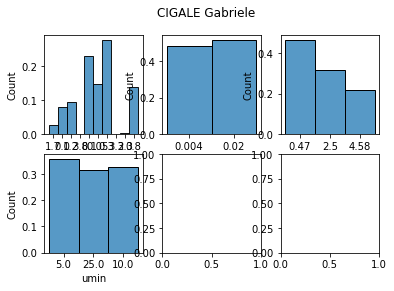

In [29]:
SED_statistical_analysis.plot_result(CIGALE_parameters,
                                      #line_dict_fit = fit_jorge,
                                      title = "CIGALE Gabriele")